# Natural Language Processing with Disaster Tweets

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.



Objective: We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

## Data import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Let's take a look at our data

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


For instance, we can see and example of a false disaster

In [39]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

And, an example of a real disaster tweet

In [40]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

We'll use scikit-learn's CountVectorizer to count the words in each tweet and turn them into data our machine learning model can process.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['target'], test_size=0.2, random_state=2)

In [5]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [12]:
train_vectors = count_vectorizer.transform(X_train)
valid_vectors= count_vectorizer.transform(X_test)
## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

# Machine Learning model

We wil find the best hyperparameter for Logistic Regression,  Classification Trees and K-Nearest Neighbor.
Then, we will find the method that performs best using test data,

In [8]:

from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

## Logistic Regression

In [36]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the data
logreg_cv.fit(train_vectors, y_train)

//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [37]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7965517241379312


In [38]:
logreg_cv.score(valid_vectors, y_test)

0.8082731451083388

In [52]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Let's define a function to plot the confution matrix

In [20]:
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['False Disaster', 'Real Disaster']); ax.yaxis.set_ticklabels(['False Disaster', 'Real Disaster']) 
    plt.show() 

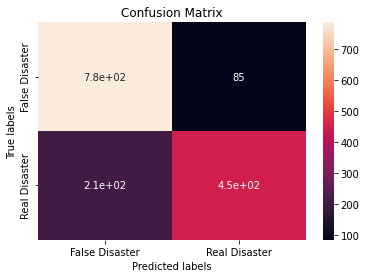

In [56]:
yhat=logreg_cv.predict(valid_vectors)
plot_confusion_matrix(y_test,yhat)

## Decision Tree

In [14]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [15]:
# GridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the data
tree_cv.fit(train_vectors, y_train)

//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [16]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.6674876847290641


In [17]:
tree_cv.score(valid_vectors, y_test)

0.6644780039395929

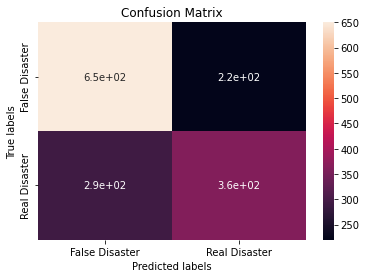

In [21]:
yhat = tree_cv.predict(valid_vectors)
plot_confusion_matrix(y_test,yhat)

## K-nearest Neighbor

In [22]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [23]:
# GridSearchCV object: knn_cv
knn_cv = GridSearchCV(KNN, parameters, cv=3)

# Fit the data
knn_cv.fit(train_vectors, y_train)

//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
//anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: canno

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [24]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.6696223316912974


In [25]:
knn_cv.score(valid_vectors, y_test)

0.6868023637557452

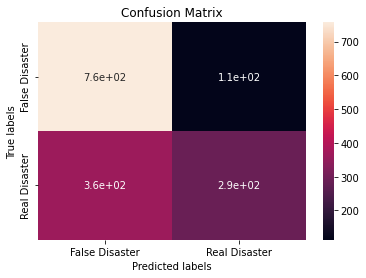

In [26]:
yhat= knn_cv.predict(valid_vectors)
plot_confusion_matrix(y_test,yhat)

# Comparing the different methods

In [29]:
results_df = {'Method':['Logistic Regression','Decision Tree Classifier','K-nearest Neighbors'],"Accuracy":[0.79655172,0.6674876847290641,0.6696223316912974]}
dfr=pd.DataFrame(results_df)
print(dfr)


                     Method  Accuracy
0       Logistic Regression  0.796552
1  Decision Tree Classifier  0.667488
2       K-nearest Neighbors  0.669622


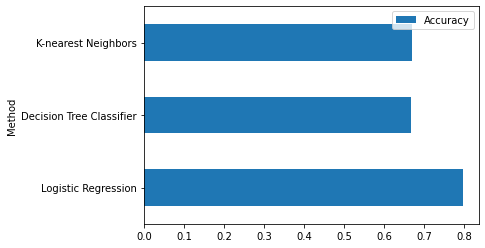

In [30]:
import numpy as np
import matplotlib.pyplot as plt

ax=dfr.plot.barh(x='Method',y='Accuracy',rot=0)

## Conclusion

The model that best performs with the data is: LOGISTIC REGRESSION. We can see we obtain an 80% accuracy.
Then, we can visualize the complete metrics for this model.


In [39]:
from sklearn import metrics
predicted=logreg_cv.predict(valid_vectors)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       870
           1       0.84      0.68      0.75       653

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523

